## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
from dataclasses import dataclass
import pandas as pd
import logging
from datetime import datetime
from typing import Optional
import warnings

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/OUTPUTEVENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/D_LABITEMS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/DRGCODES.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/SHA256SUMS.txt
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/D_ICD_DIAGNOSES.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/DATETIMEEVENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/CAREGIVERS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/INPUTEVENTS_MV.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/CHARTEVENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/D_ICD_PROCEDURES.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/PATIENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/TRANSFERS.csv
/kagg

In [3]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
data_dir = pathlib.Path("/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/")
file_paths = {
    'admissions': data_dir / 'ADMISSIONS.csv',
    'patients': data_dir / 'PATIENTS.csv',
    'icustays': data_dir / 'ICUSTAYS.csv',
    'diagnoses': data_dir / 'DIAGNOSES_ICD.csv',
    'procedures': data_dir / 'PROCEDURES_ICD.csv',
    'outputevents': data_dir / 'OUTPUTEVENTS.csv',
    'inputevents_mv': data_dir / 'INPUTEVENTS_MV.csv',
    'inputevents_cv': data_dir / 'INPUTEVENTS_CV.csv',
    'labevents': data_dir / 'LABEVENTS.csv',
    'chartevents': data_dir / 'CHARTEVENTS.csv'
}

In [5]:
def load_csv(file_path, chunksize=None):
    if chunksize:
        return pd.concat(pd.read_csv(file_path, chunksize=chunksize, low_memory=False))
    else:
        return pd.read_csv(file_path, low_memory=False)

In [6]:
admissions = load_csv(file_paths['admissions'])
patients = load_csv(file_paths['patients'])
icustays = load_csv(file_paths['icustays'])
diagnoses = load_csv(file_paths['diagnoses'])
procedures = load_csv(file_paths['procedures'])
outputevents = load_csv(file_paths['outputevents'])
inputevents_mv = load_csv(file_paths['inputevents_mv'])
inputevents_cv = load_csv(file_paths['inputevents_cv'])
labevents = load_csv(file_paths['labevents'], chunksize=1000000)
chartevents = load_csv(file_paths['chartevents'], chunksize=1000000)

print("Loaded all files successfully.")

Loaded all files successfully.


In [7]:
def basic_eda(df, name):
    print(f"\n--- EDA for {name} ---")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("Missing Values:\n", df.isnull().sum())

In [8]:
basic_eda(admissions, 'ADMISSIONS')


--- EDA for ADMISSIONS ---
Shape: (129, 19)
Columns: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']
Missing Values:
 row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64


In [9]:
basic_eda(patients, 'PATIENTS')


--- EDA for PATIENTS ---
Shape: (100, 8)
Columns: ['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag']
Missing Values:
 row_id          0
subject_id      0
gender          0
dob             0
dod             0
dod_hosp       30
dod_ssn        23
expire_flag     0
dtype: int64


In [10]:
basic_eda(icustays, 'ICUSTAYS')


--- EDA for ICUSTAYS ---
Shape: (136, 12)
Columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'dbsource', 'first_careunit', 'last_careunit', 'first_wardid', 'last_wardid', 'intime', 'outtime', 'los']
Missing Values:
 row_id            0
subject_id        0
hadm_id           0
icustay_id        0
dbsource          0
first_careunit    0
last_careunit     0
first_wardid      0
last_wardid       0
intime            0
outtime           0
los               0
dtype: int64


In [11]:
basic_eda(diagnoses, 'DIAGNOSES_ICD')


--- EDA for DIAGNOSES_ICD ---
Shape: (1761, 5)
Columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']
Missing Values:
 row_id        0
subject_id    0
hadm_id       0
seq_num       0
icd9_code     0
dtype: int64


In [12]:
basic_eda(procedures, 'PROCEDURES_ICD')


--- EDA for PROCEDURES_ICD ---
Shape: (506, 5)
Columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']
Missing Values:
 row_id        0
subject_id    0
hadm_id       0
seq_num       0
icd9_code     0
dtype: int64


In [13]:
basic_eda(outputevents, 'OUTPUTEVENTS')


--- EDA for OUTPUTEVENTS ---
Shape: (11320, 13)
Columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'value', 'valueuom', 'storetime', 'cgid', 'stopped', 'newbottle', 'iserror']
Missing Values:
 row_id            0
subject_id        0
hadm_id           0
icustay_id        1
charttime         0
itemid            0
value           160
valueuom         47
storetime         0
cgid              0
stopped       11320
newbottle     11320
iserror       11320
dtype: int64


In [14]:
basic_eda(inputevents_mv, 'INPUTEVENTS_MV')


--- EDA for INPUTEVENTS_MV ---
Shape: (13224, 31)
Columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'starttime', 'endtime', 'itemid', 'amount', 'amountuom', 'rate', 'rateuom', 'storetime', 'cgid', 'orderid', 'linkorderid', 'ordercategoryname', 'secondaryordercategoryname', 'ordercomponenttypedescription', 'ordercategorydescription', 'patientweight', 'totalamount', 'totalamountuom', 'isopenbag', 'continueinnextdept', 'cancelreason', 'statusdescription', 'comments_editedby', 'comments_canceledby', 'comments_date', 'originalamount', 'originalrate']
Missing Values:
 row_id                               0
subject_id                           0
hadm_id                              0
icustay_id                           0
starttime                            0
endtime                              0
itemid                               0
amount                               0
amountuom                            0
rate                              5889
rateuom                        

In [15]:
basic_eda(inputevents_cv, 'INPUTEVENTS_CV')


--- EDA for INPUTEVENTS_CV ---
Shape: (34799, 22)
Columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'amount', 'amountuom', 'rate', 'rateuom', 'storetime', 'cgid', 'orderid', 'linkorderid', 'stopped', 'newbottle', 'originalamount', 'originalamountuom', 'originalroute', 'originalrate', 'originalrateuom', 'originalsite']
Missing Values:
 row_id                   0
subject_id               0
hadm_id                  0
icustay_id               0
charttime                0
itemid                   0
amount               10061
amountuom             9796
rate                 25337
rateuom              25251
storetime                0
cgid                   541
orderid                  0
linkorderid              0
stopped              33989
newbottle            34277
originalamount       13585
originalamountuom     9565
originalroute           17
originalrate         23288
originalrateuom      23284
originalsite         34793
dtype: int64


In [16]:
labevents_sample = load_csv(file_paths['labevents']).head(10000)
chartevents_sample = load_csv(file_paths['chartevents']).head(10000)
basic_eda(labevents_sample, 'LABEVENTS (Sample)')
basic_eda(chartevents_sample, 'CHARTEVENTS (Sample)')


--- EDA for LABEVENTS (Sample) ---
Shape: (10000, 9)
Columns: ['row_id', 'subject_id', 'hadm_id', 'itemid', 'charttime', 'value', 'valuenum', 'valueuom', 'flag']
Missing Values:
 row_id           0
subject_id       0
hadm_id       3001
itemid           0
charttime        0
value            0
valuenum      1270
valueuom      1230
flag          6097
dtype: int64

--- EDA for CHARTEVENTS (Sample) ---
Shape: (10000, 15)
Columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime', 'storetime', 'cgid', 'value', 'valuenum', 'valueuom', 'warning', 'error', 'resultstatus', 'stopped']
Missing Values:
 row_id              0
subject_id          0
hadm_id             0
icustay_id          7
itemid              0
charttime           0
storetime           0
cgid                0
value               0
valuenum            0
valueuom          582
warning             0
error               0
resultstatus    10000
stopped         10000
dtype: int64


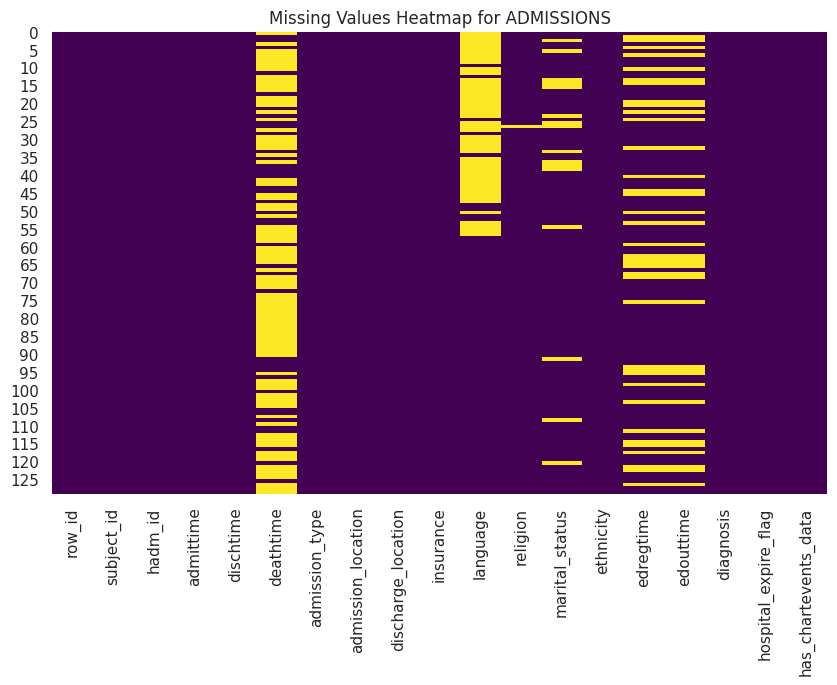

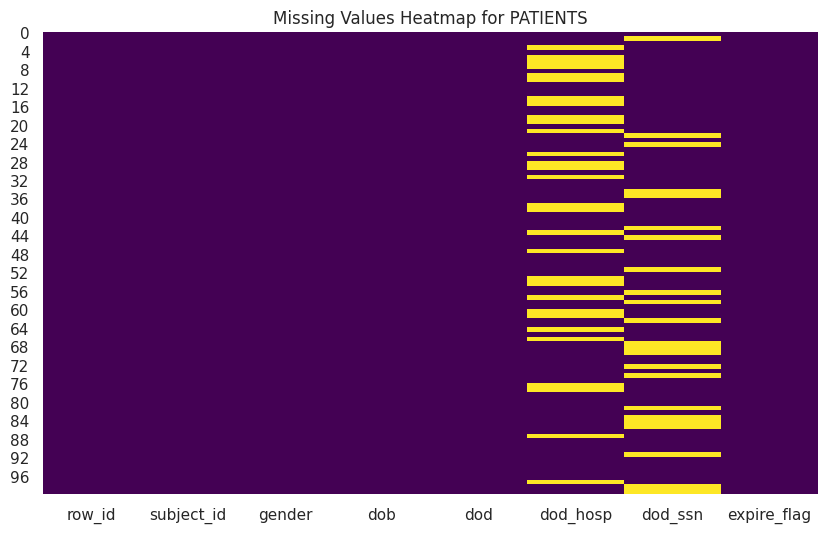

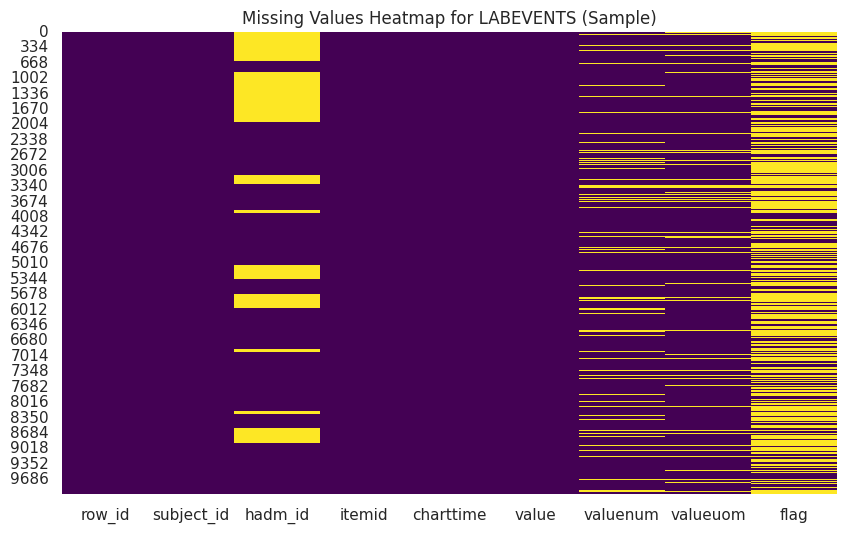

In [17]:
def plot_missing_values(df, name):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Values Heatmap for {name}")
    plt.show()

plot_missing_values(admissions, 'ADMISSIONS')
plot_missing_values(patients, 'PATIENTS')

plot_missing_values(labevents_sample, 'LABEVENTS (Sample)')

In [18]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

@dataclass
class AgeCalculator:
    patients_df: pd.DataFrame
    admissions_df: pd.DataFrame

    def __post_init__(self):
        self.patients_df['dob'] = pd.to_datetime(self.patients_df["dob"], errors='coerce')
        self.admissions_df['admittime'] = pd.to_datetime(self.admissions_df['admittime'], errors='coerce')

    def calculate_age(self, subject_id: int, hadm_id: int) -> Optional[float]:
        try:
            dob = self.patients_df[self.patients_df['subject_id'] == subject_id]['dob'].iloc[0]
            admittime = self.admissions_df[self.admissions_df['hadm_id'] == hadm_id]['admittime'].iloc[0]
            
            if pd.isna(dob) or pd.isna(admittime):
                logger.warning(f"Missing DOB or ADMITTIME for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}")
                return None
            
            dob_dt = dob.to_pydatetime()
            admittime_dt = admittime.to_pydatetime()

            year_diff = admittime_dt.year - dob_dt.year
            if year_diff > 150:
                logger.info(f"Age > 150 for SUBJECT_ID={subject_id}, setting to 90")
                return 90.0

            age = (admittime_dt - dob_dt).days / 365.25
            
            if age < 0:
                logger.warning(f"Negative age ({age}) for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}")
                return None
                
            return age
        except IndexError:
            logger.error(f"No data for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}")
            return None
        except Exception as e:
            logger.error(f"Error calculating age for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}: {str(e)}")
            return None

    def add_age_to_admissions(self) -> pd.DataFrame:
        result = self.admissions_df.copy()
        result['age'] = result.apply(
            lambda row: self.calculate_age(row['subject_id'], row['hadm_id']), axis=1
        )
        return result

In [19]:
def plot_distributions(df, columns, name):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f"Distribution of {col} in {name}")
            plt.show()
            
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col].dropna())
            plt.title(f"Boxplot of {col} in {name}")
            plt.show()

In [20]:
patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
age_calculator = AgeCalculator(patients, admissions)
admissions_with_age = age_calculator.add_age_to_admissions()
patients = patients.merge(
    admissions_with_age[['subject_id', 'age']].drop_duplicates('subject_id'),
    on='subject_id',
    how='left'
)

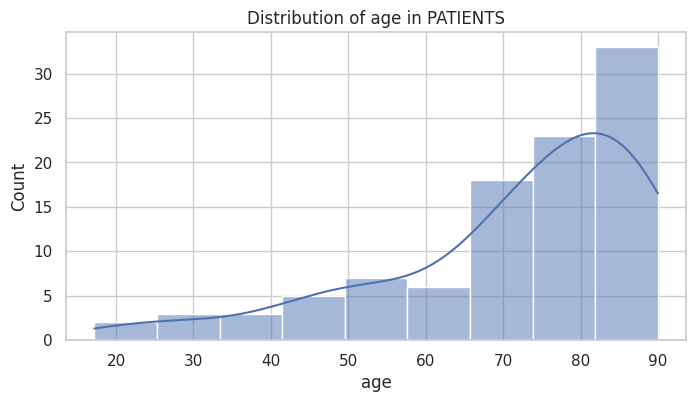

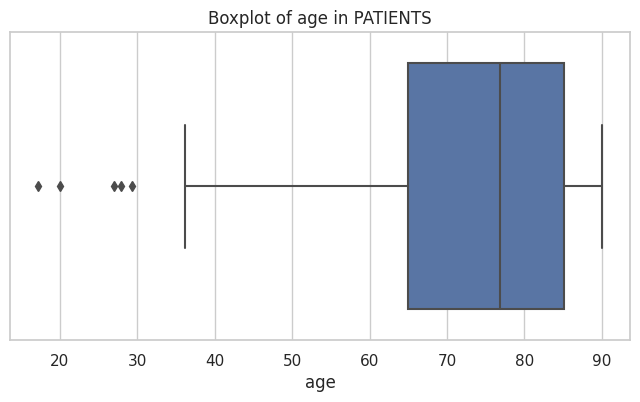

In [21]:
plot_distributions(patients, ['age'], 'PATIENTS')

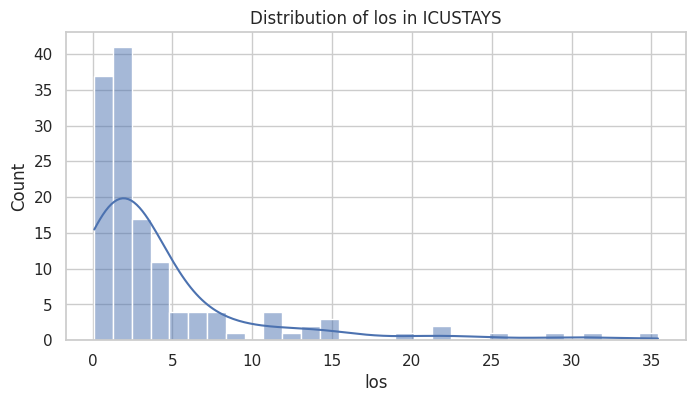

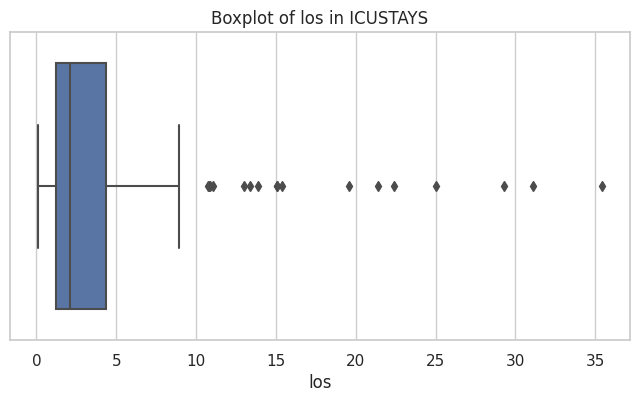

In [22]:
plot_distributions(icustays, ['los'], 'ICUSTAYS')

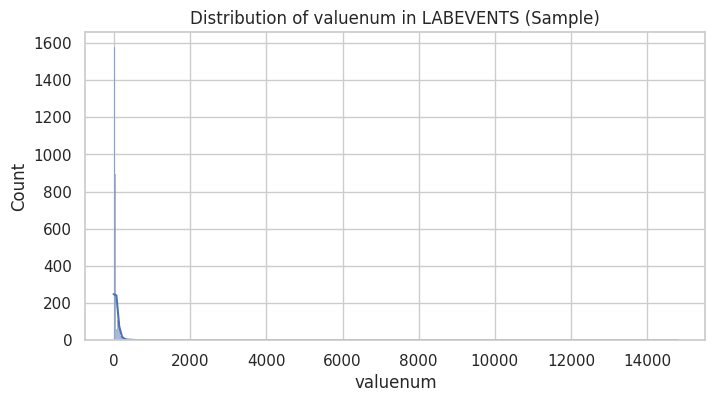

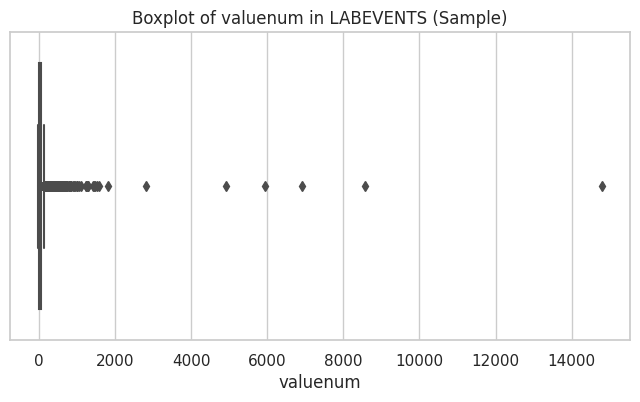

In [23]:
plot_distributions(labevents_sample, ['valuenum'], 'LABEVENTS (Sample)')

In [24]:
def plot_categorical(df, column, name):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Top 10
    plt.title(f"Count of {column} in {name} (Top 10)")
    plt.show()
    
    df[column].value_counts(normalize=True)[:5].plot.pie(autopct='%1.1f%%')  # Top 5 pie
    plt.title(f"Pie Chart of {column} in {name} (Top 5)")
    plt.show()

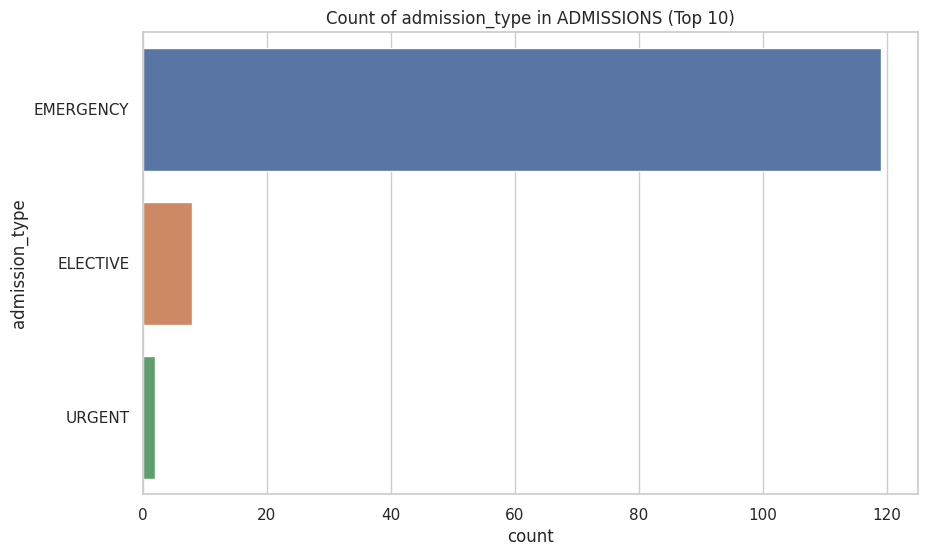

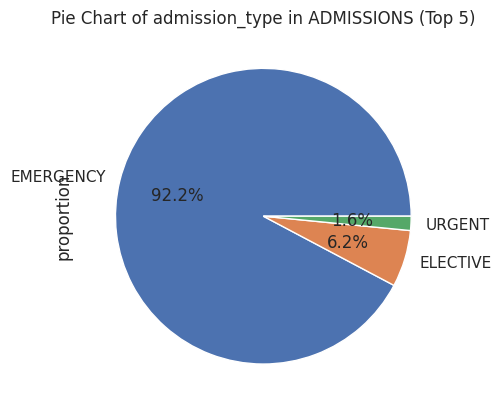

In [25]:
plot_categorical(admissions, 'admission_type', 'ADMISSIONS')

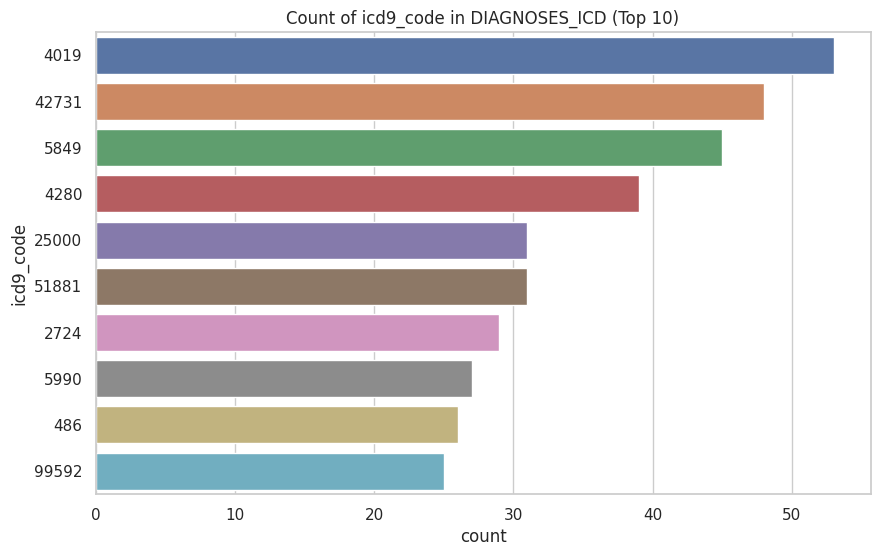

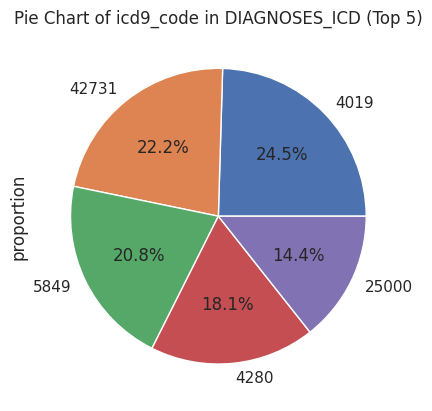

In [26]:
plot_categorical(diagnoses, 'icd9_code', 'DIAGNOSES_ICD')

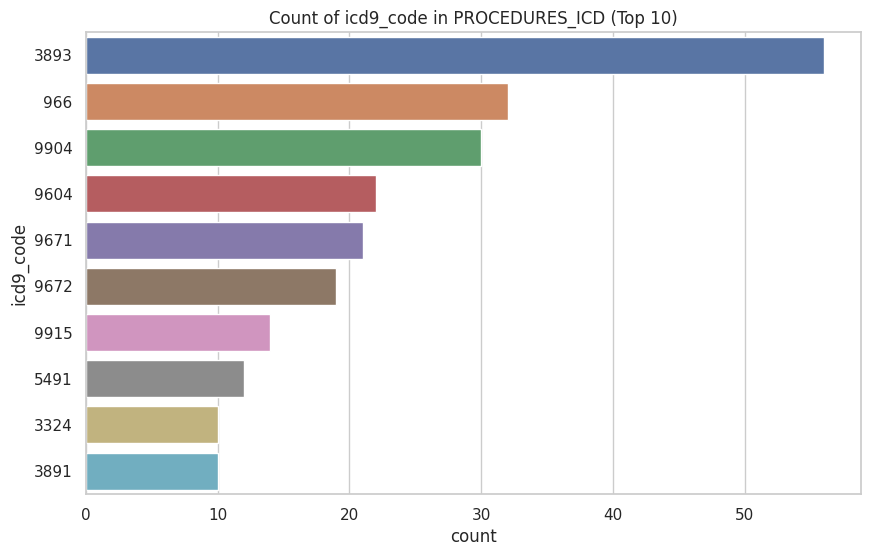

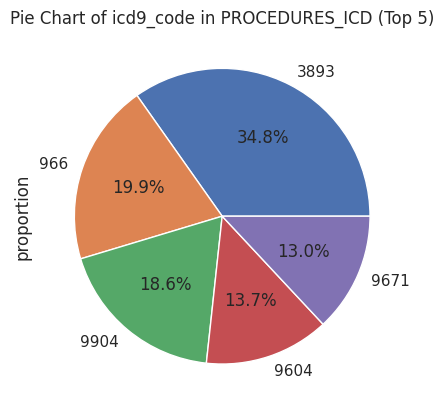

In [27]:
plot_categorical(procedures, 'icd9_code', 'PROCEDURES_ICD')

In [28]:
def plot_correlation(df, name):
    corr = df.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {name}")
    plt.show()

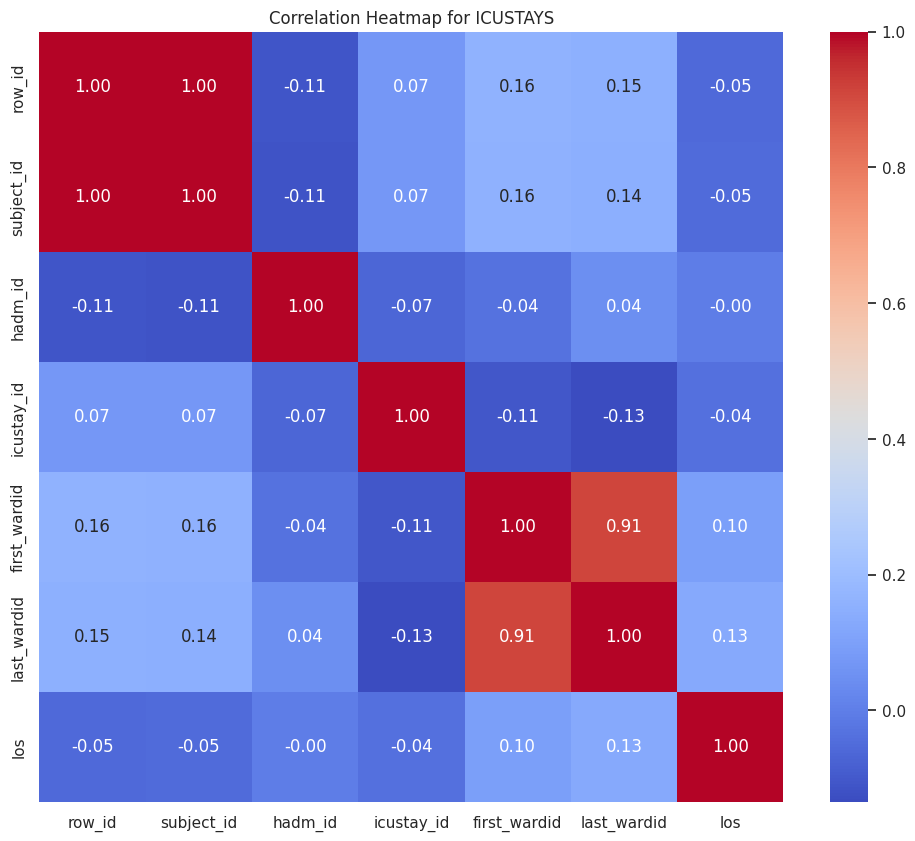

In [29]:
plot_correlation(icustays, 'ICUSTAYS')

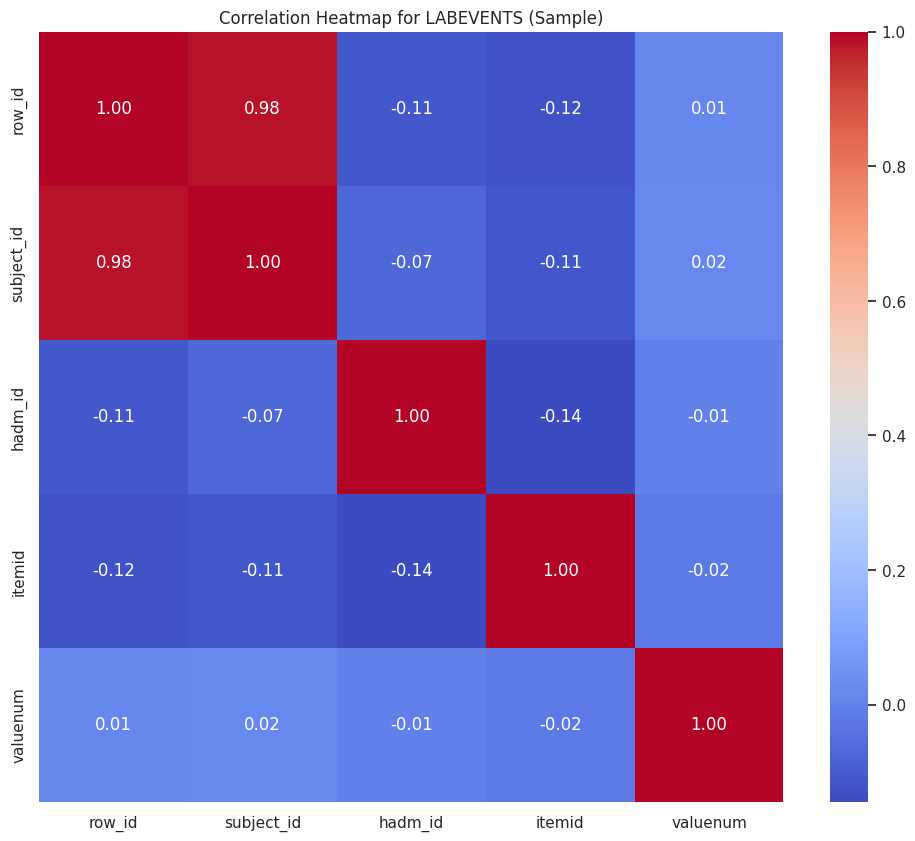

In [30]:
plot_correlation(labevents_sample, 'LABEVENTS (Sample)')

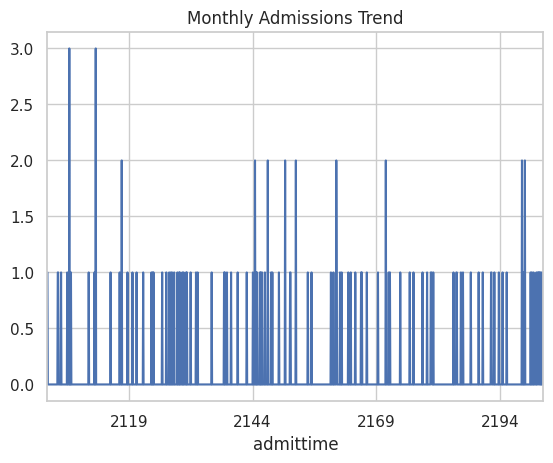

In [31]:
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions.set_index('admittime').resample('M').size().plot()
plt.title('Monthly Admissions Trend')
plt.show()

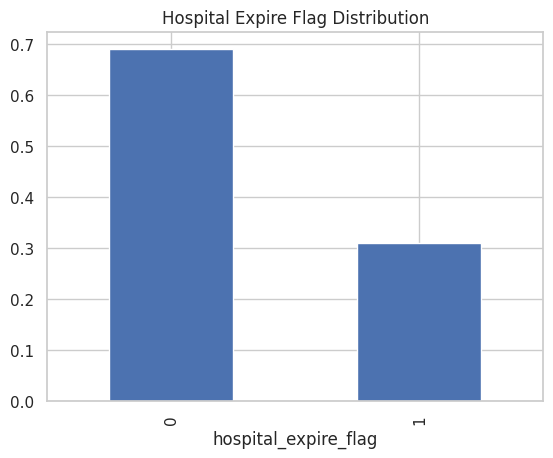

In [32]:
merged = pd.merge(patients, admissions, on='subject_id')
merged['hospital_expire_flag'].value_counts(normalize=True).plot.bar()
plt.title('Hospital Expire Flag Distribution')
plt.show()

In [33]:
print(merged.columns)

Index(['row_id_x', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag', 'age', 'row_id_y', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')


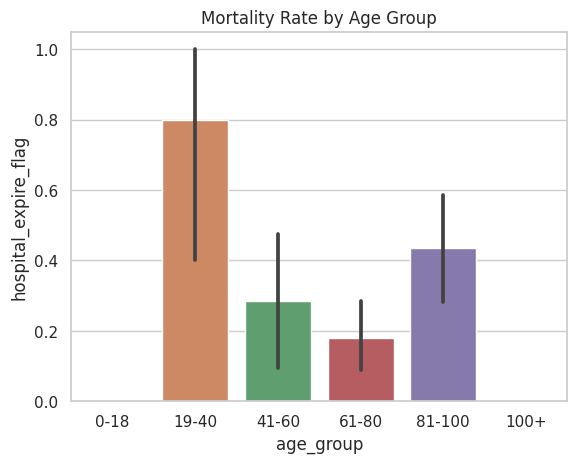

In [34]:
merged['age_group'] = pd.cut(merged['age'], bins=[0, 18, 40, 60, 80, 100, np.inf], labels=['0-18', '19-40', '41-60', '61-80', '81-100', '100+'])
sns.barplot(x='age_group', y='hospital_expire_flag', data=merged)
plt.title('Mortality Rate by Age Group')
plt.show()

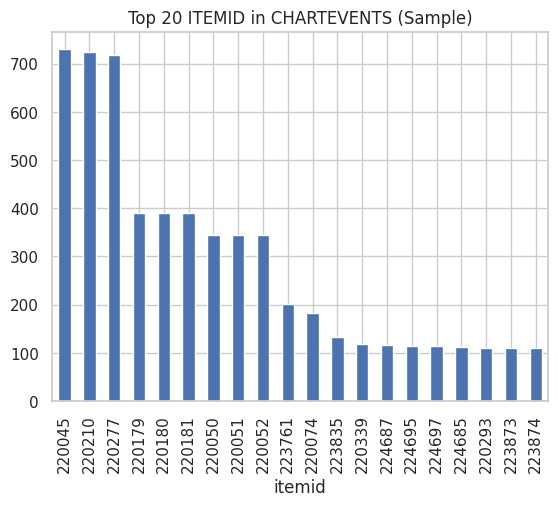

In [35]:
itemid_counts = chartevents_sample['itemid'].value_counts()[:20]
itemid_counts.plot.bar()
plt.title('Top 20 ITEMID in CHARTEVENTS (Sample)')
plt.show()

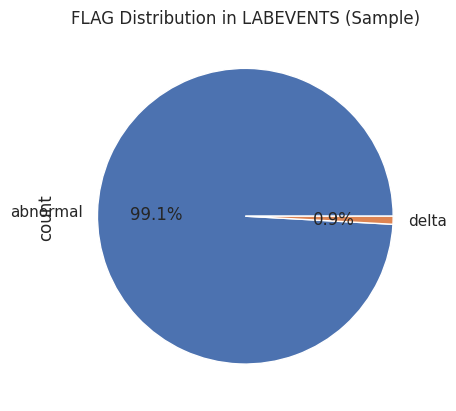

In [36]:
labevents_sample['flag'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('FLAG Distribution in LABEVENTS (Sample)')
plt.show()